#Machine Learning->Statistical Information or Formulas used to create model.
#whereas,
#Deep Learning->Artificial Neural Networks are used to create model
###Everything else other than model creation is same in between ML mand DL, the main purpose being to predict anything from data after training the model, we get a function that can be used to predict anything.

###Regression is used for continuous data, whereas Classification is used to choose from different classes.

#Artificial Neural Network(ANN)

###Images, sound clips and videos are highly non linear. 
###To increase the non-linearity we use activation functions like Sigmoid/relu/Softmax
###Relu is the most popular and is mostly used activation function.


###All the inputs have a corresponding weight associated with it. 
###First part of neuron is to multiply the inputs of the previous neuron with weights i.e.,find a=x1w1 + x2w2+.....
###Another task is Activation Function, that is used to increase the non-linearity.

###Deep Learning:
###Forward Propagation
###Back Propagation/Updation(As we update the weight here)

###To deal with non linear data we have to increase non linearity in our data to make it more complex.

###Tensorflow is quite complex, so keras can be used as a high level option for it.
###Tensorflow is a deep learning package/library.

###Colab gives us Free GPU->Graphic Processing Unit, GPU's are faster than CPU.
###All the libraries are pre-installed.

#Image Classification 

###MNISTN is a very popular dataset for Image Classification.
###It has 20X20 dataset.
###Each image is a grey scale.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [0]:
#We have 60000 images in x_train of 28X28

In [9]:
x_test.shape

(10000, 28, 28)

In [0]:
#As it is a greyscale it reads only 28X28
#In case of coloured or RGB(Red Green Blue) image it would have been 28X28X3, but the last part is ignored here as it is a black-white or greyscale image.

In [11]:
y_train.shape

(60000,)

In [12]:
y_test.shape

(10000,)

In [0]:
#So is the case for y_train and y_test as it only contains the number for all the images in x_train and x_shape where as they themselve contains the images also.

In [0]:
def plot_img(img):
    plt.imshow(img.reshape(28,28), cmap="gray");#cmap is used for mapping scheme

Image is :  1


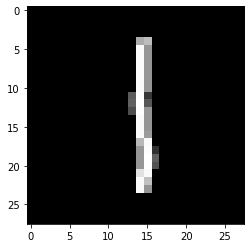

In [25]:
plot_img(x_train[1002])
print("Image is : ", y_train[1002])

#Model Building

In [0]:
#Create 5 layer Neural Network.

In [0]:
#Hyperparameter->the parameter that we have to define.

In [0]:
#Output layer no. of neurons = Unique classx_train[6878].shape

In [0]:
#Input layer number of neurons = no. of features.

In [36]:
x_train.shape

(60000, 28, 28)

In [0]:
#Reshape the image to (1, 784)
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [0]:
#Flatenning the 28X28 image means one will follow the other 28 times both length and breadth wise.
#ANN cannot handle data in 28X28 format it can only work with flattened data, so we need to reshape our whole data.

In [38]:
x_train.shape

(60000, 784)

In [39]:
x_test.shape

(10000, 784)

In [0]:
#We are reshaping our data in order to get 2D data

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape = (784,)))#adding the first hidden layer
#Ignore the input layer in model.add()
model.add(Dense(units=64, activation='relu'))#relu function is used to increase the non-linearity
#We may not add the input_shape parameter in the next layer, as it knows from the first layer, but is must for the first layer
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))#final or the output layer

In [0]:
#To convert values into probability, we use softmax function

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])#if there were only two classes then use binary_crossentropy in loss, but in case of multiple class classification use categorical_crossentropy, so binary_crossentropy is a sunset of categorical_crossentropy
#adam, sgd, rmsprop->algorithms that we can use in optimizer section
#Param is the weights associated.
#It is not possible to do back propagation without knowing the output, so we first need to do forward propagation.

In [48]:
y_train.shape

(60000,)

In [0]:
#One Hot Encoding is very important while doing multi-class classification
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train)

In [0]:
y_test = to_categorical(y_test)

In [52]:
y_train.shape

(60000, 10)

In [54]:
y_test.shape

(10000, 10)

In [0]:
#10 represents the unique number of classes, or the number of neurons in the output layer

In [56]:
hist = model.fit(x = x_train, y= y_train, batch_size = 32, epochs = 10, validation_data=(x_test, y_test))
#model training can be done in the above way

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.9391 - accuracy: 0.7805 - val_loss: 0.3845 - val_accuracy: 0.8975
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3185 - accuracy: 0.9107 - val_loss: 0.2470 - val_accuracy: 0.9297
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2428 - accuracy: 0.9312 - val_loss: 0.2295 - val_accuracy: 0.9356
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2052 - accuracy: 0.9420 - val_loss: 0.2036 - val_accuracy: 0.9413
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1806 - accuracy: 0.9484 - val_loss: 0.1882 - val_accuracy: 0.9480
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1627 - accuracy: 0.9531 - val_loss: 0.1693 - val_accuracy: 0.9545
Epoch 7/10
60000/60000 [==============================] - 3s 58us/st

In [0]:
#loss is decreasing, and the accuracy and validation accuracy is increasing with every iteration, until it reaches a saturation
#batch_size = 32 example in 1 iteration
#epochs = 10 means 10 iterations(# of iterations)

In [58]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 23us/step


[0.16348506384557113, 0.9596999883651733]

In [0]:
#This means out of 10000 images 9600 images are being predicted correctly.

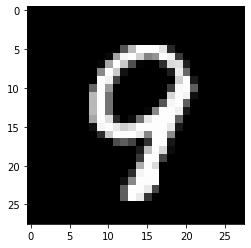

In [65]:
plot_img(x_test[5001])

In [0]:
y_pred = model.predict_classes(x_test)

In [68]:
y_pred[5001]

9

In [69]:
model.predict_classes(x_test[[5000]])

array([3])

In [0]:
#Both the ways above can be used to predict the model

In [0]:
#Upload your own images and predict for that code:
#this code is custom image.

In [0]:
from keras.preprocessing import image

In [0]:
img = image.load_img("name.png", grayscale=True, target_size=(28,28))
img = np.array(img)
img = img.reshape(1,784)

prediction = model.predict_classes(img)

In [0]:
prediction